In [1]:
#create imports
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
#read in csv file 
df = pd.read_csv("Crimes_-_2001_to_Present.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
0,13243924,JG464274,10/14/2023 12:00:00 AM,064XX S RICHARDS DR,0620,BURGLARY,UNLAWFUL ENTRY,SMALL RETAIL STORE,False,False,...,"(41.778300831, -87.579382212)",32.0,22538.0,9.0,134.0,33.0,24.0,18.0,262.0,3.0
1,13243074,JG463188,10/14/2023 12:00:00 AM,020XX E 72ND ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"(41.764344342, -87.575359659)",32.0,22538.0,39.0,453.0,33.0,24.0,18.0,89.0,3.0
2,13242725,JG462742,10/14/2023 12:00:00 AM,006XX N DEARBORN ST,0460,BATTERY,SIMPLE,RESTAURANT,False,False,...,"(41.893541578, -87.629701805)",22.0,4446.0,37.0,669.0,36.0,55.0,14.0,72.0,42.0
3,13242813,JG462769,10/13/2023 11:55:00 PM,093XX S STEWART AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,...,"(41.724236354, -87.632874527)",18.0,21554.0,45.0,187.0,13.0,59.0,20.0,242.0,11.0
4,13242796,JG462746,10/13/2023 11:53:00 PM,078XX S KINGSTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"(41.753065615, -87.562621485)",43.0,22538.0,39.0,246.0,37.0,24.0,19.0,225.0,5.0


In [3]:
# Clean the data
# Specify the columns to hide
columns_to_hide = ["ID","Case Number","Block","IUCR","Description","Location Description","Arrest","Domestic","Historical Wards 2003-2015","Community Areas","Census Tracts","Police Beats","FBI Code"]

# Drop the specified columns
df = df.drop(columns=columns_to_hide)

relevant_crimes = df.dropna()
relevant_crimes = relevant_crimes.drop_duplicates()

In [4]:
#check the new headers 
df.head()

,Date,Primary Type,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Zip Codes,Wards,Boundaries - ZIP Codes,Police Districts,Wards 2023-
0,10/14/2023 12:00:00 AM,BURGLARY,331,3.0,5.0,42.0,1189894.0,1862705.0,2023,10/21/2023 03:42:03 PM,41.778301,-87.579382,"(41.778300831, -87.579382212)",22538.0,33.0,24.0,18.0,3.0
1,10/14/2023 12:00:00 AM,BATTERY,333,3.0,5.0,43.0,1191036.0,1857629.0,2023,10/21/2023 03:42:03 PM,41.764344,-87.575360,"(41.764344342, -87.575359659)",22538.0,33.0,24.0,18.0,3.0
2,10/14/2023 12:00:00 AM,BATTERY,1832,18.0,42.0,8.0,1175825.0,1904582.0,2023,10/21/2023 03:42:03 PM,41.893542,-87.629702,"(41.893541578, -87.629701805)",4446.0,36.0,55.0,14.0,42.0
3,10/13/2023 11:55:00 PM,ASSAULT,634,6.0,9.0,49.0,1175464.0,1842881.0,2023,10/21/2023 03:42:03 PM,41.724236,-87.632875,"(41.724236354, -87.632874527)",21554.0,13.0,59.0,20.0,11.0
4,10/13/2023 11:53:00 PM,BATTERY,421,4.0,7.0,43.0,1194548.0,1853550.0,2023,10/21/2023 03:42:03 PM,41.753066,-87.562621,"(41.753065615, -87.562621485)",22538.0,37.0,24.0,19.0,5.0


In [5]:
# Display the number of rows in the cleaned DataFrame
row_count_cleaned = len(relevant_crimes)
print(f"Number of rows in the cleaned DataFrame: {row_count_cleaned}")

Number of rows in the cleaned DataFrame: 2197760


In [6]:
#define chicago lat and long 
chicago_latitude_min = 41.6
chicago_latitude_max = 42.1
chicago_longitude_min = -88.0
chicago_longitude_max = -87.5

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
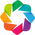

BokehModel(combine_events=True, render_bundle={'docs_json': {'acf1c876-47c5-4c58-94aa-b8d2d2ab015f': {'version…

In [7]:
# Create heatmap
import sqlite3
import numpy as np
import pandas as pd
import holoviews as hv
import colorcet as cc
import panel as pn
from holoviews.element.tiles import EsriImagery
from datashader.utils import lnglat_to_meters
import hvplot.pandas 
hv.extension('bokeh')
map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=500,bgcolor="black")

# Create a plot 
crime_map = relevant_crimes.hvplot(
    x="Longitude",
    y="Latitude",
    geo=True,
    kind="points",
    rasterize=True,
    cmap= cc.fire,
    cnorm="eq_hist",
    colorbar=True,
    tiles="CartoLight",
)

crime_map*map_tiles

In [8]:
# Group by District and Category and count the occurrences
crime_counts = df.groupby(['Police Districts', 'Primary Type']).size().reset_index(name='Count')

# Pivot the data to create a table with Districts as rows and Categories as columns
counts_table = crime_counts.pivot_table(index='Police Districts', columns='Primary Type', values='Count', fill_value=0)

# Add a new column that contains the total count for each district
counts_table['Total'] = counts_table.sum(axis=1)

print(counts_table)

Primary Type      ARSON  ASSAULT  BATTERY  BURGLARY   Total
Police Districts                                           
1.0                 429    12255    36022     16168   64874
2.0                 135     8693    23565      7582   39975
3.0                   0        0        9         0       9
4.0                   0      117      226        60     403
5.0                 311    15497    45330     23612   84750
6.0                1238    28838    79357     28154  137587
7.0                 587    16719    44805     21833   83944
8.0                   0        1        0         0       1
9.0                 375    18149    45284     15850   79658
10.0                737    29983    78275     20516  129511
11.0                281    13844    40404     13668   68197
12.0                422    14319    37178     15470   67389
13.0               1212    33799    88069     38053  161133
14.0                138    13469    43312     11602   68521
15.0                572    23691    6063

In [49]:
# Sample mapping of police districts to areas
district_to_area = {
    1.0: "Central District",
    2.0: "South District",
    3.0: "North District",
    4.0:"South District",
    5.0:"South District",
    6.0:"Central District",
    7.0:"Central District",
    8.0:"Central District",
    9.0:"Central District",
    10.0:"South District",
    11.0:"North District",
    12.0:"North District",
    14.0:"Central District",
    15.0:"North District",
    16.0:"North District",
    17.0:"North District",
    19.0:"North District",
    20.0:"North District",
    21.0:"North District",
    22.0:"South District",
    24.0:"North District",
    25.0:"North District",
}

# Assuming you have a DataFrame with a "Police District" column
df['Area'] = df['Police Districts'].map(district_to_area)


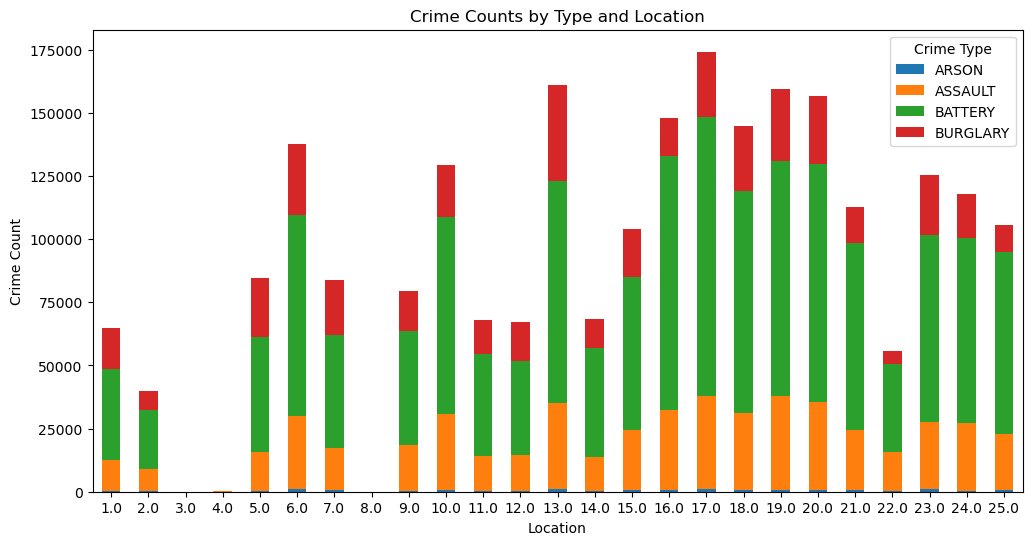

In [54]:
# Create a stacked bar chart
counts_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Location')
plt.ylabel('Crime Count')
plt.title('Crime Counts by Type and Location')
plt.xticks(rotation=0)
plt.legend(title='Crime Type')
plt.show()

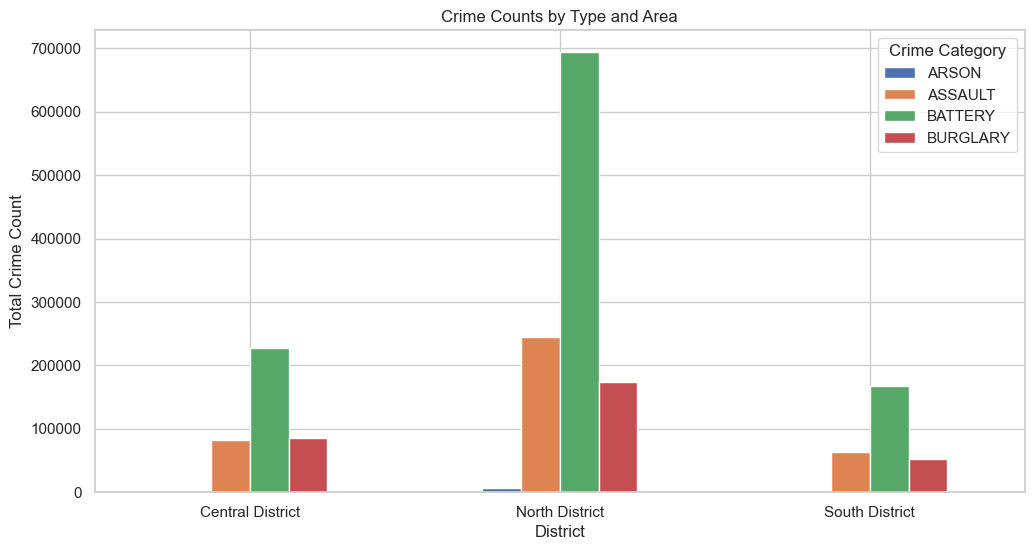

In [90]:
# Create a bar chart
pivot_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('District')
plt.ylabel('Total Crime Count')
plt.title('Crime Counts by Type and Area')
plt.xticks(rotation=0)
plt.legend(title='Crime Category')
plt.show()

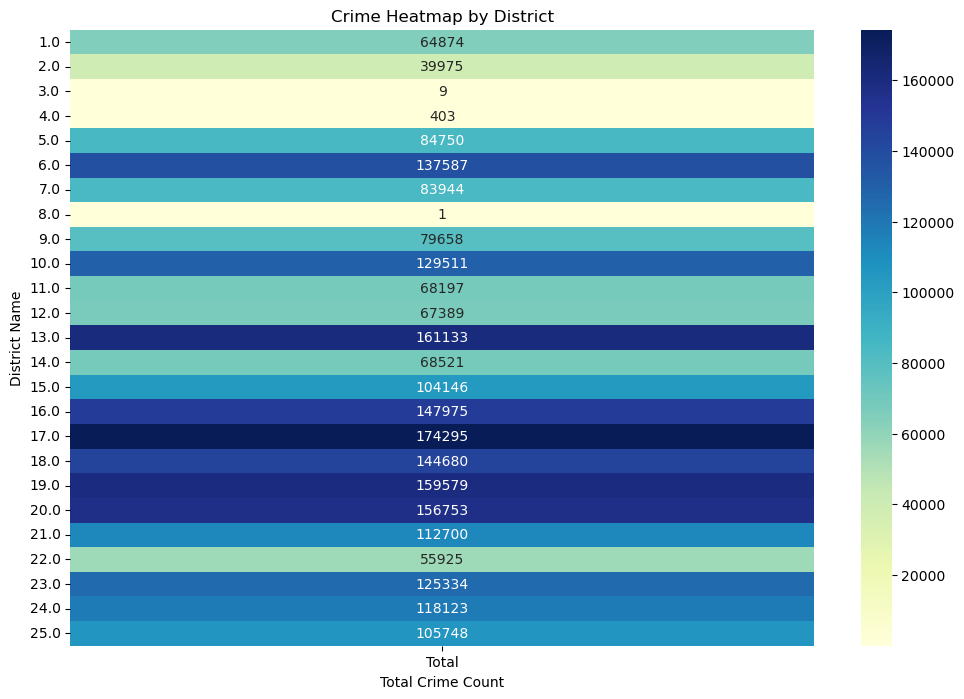

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to map district numbers to district names
district_names = {
    1.0: "Central District",
    2.0: "South District",
    3.0: "North District",
    4.0:"South District",
    5.0:"South District",
    6.0:"Central District",
    7.0:"Central District",
    8.0:"Central District",
    9.0:"Central District",
    10.0:"South District",
    11.0:"North District",
    12.0:"North District",
    14.0:"Central District",
    15.0:"North District",
    16.0:"North District",
    17.0:"North District",
    19.0:"North District",
    20.0:"North District",
    21.0:"North District",
    22.0:"South District",
    24.0:"North District",
    25.0:"North District",
    31.0:"South District"
}

# Map district names to the DataFrame
relevant_crimes['District Name'] = relevant_crimes['District'].map(district_names)

# Create a pivot table
pivot_table = counts_table.pivot_table(index="Police Districts", values="Total")

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Crime Heatmap by District")
plt.xlabel("Total Crime Count")
plt.ylabel("District Name") 
plt.show() 

In [12]:
# Group the data by 'Year' and get the count of each 'Primary Type'
crimes_per_year = df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
crimes_per_year

,Year,Primary Type,Count
0,2001,ARSON,1011
1,2001,ASSAULT,31384
2,2001,BATTERY,93463
3,2001,BURGLARY,26014
4,2002,ARSON,1032
...,...,...,...
87,2022,BURGLARY,7594
88,2023,ARSON,396
89,2023,ASSAULT,17765
90,2023,BATTERY,34839


In [91]:
# Create a line plot with different colored lines for each crime type
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("tab10", n_colors=4)  # Choose a color palette

# Modify this line to use the correct column name for the count of crimes
sns.lineplot(data=crimes_per_year, x='Year', y='Count', hue='Police Districts', errorbar=None, palette=palette)

# Customize the appearance of the plot
plt.title("Crime Trends by District")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend(title='District')
plt.show()

ValueError: Could not interpret value `Police Districts` for parameter `hue`

<Figure size 1200x600 with 0 Axes>

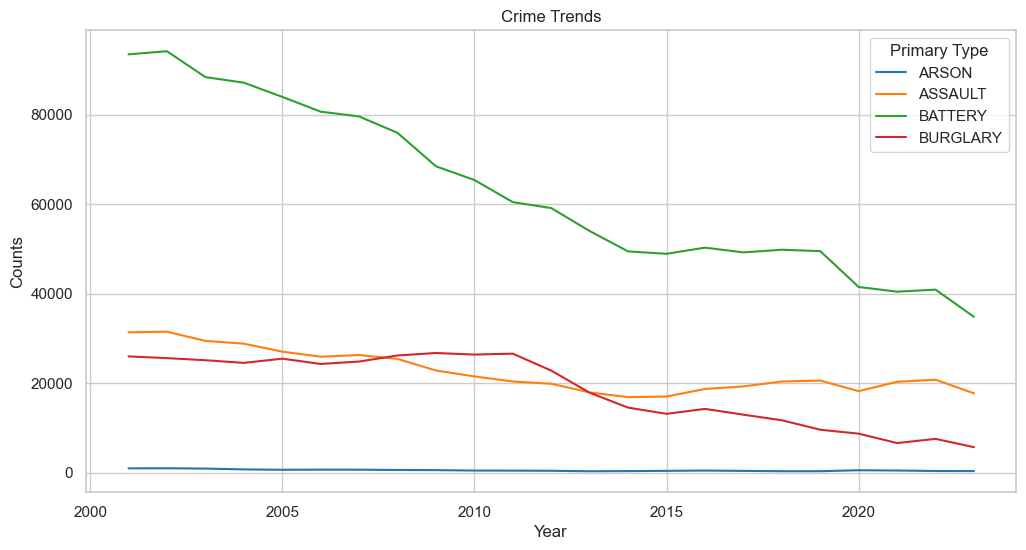

In [84]:
# Create a line plot with different colored lines for each crime type
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("tab10", n_colors=4)  # Choose a color palette

# Loop through each crime type and plot a line for it
for crime_type, color in zip(crimes_per_year['Primary Type'].unique(), palette):
    df_subset = crimes_per_year[crimes_per_year['Primary Type'] == crime_type]
    sns.lineplot(data=df_subset, x='Year', y='Count', hue='Primary Type', errorbar=None, palette=[color])

# Customize the appearance of the plot
plt.title("Crime Trends Over The Years")
plt.xlabel("Year")
plt.ylabel("Counts")
plt.legend(title='Primary Type')
plt.show()

In [83]:
from scipy import stats

# Filter the data for the year 2001 and 2023
crime_data_2001 = crimes_per_year[crimes_per_year['Year'] == 2001]
crime_data_2023 = crimes_per_year[crimes_per_year['Year'] == 2023]

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(crimes_per_year['Total'], crimes_per_year['Total'])

# Print the results
print(f'Two-Sample T-Test Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Determine the significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('There is a significant difference between the crime counts in 2001 and 2023.')
else:
    print('There is no significant difference between the crime counts in 2001 and 2023.')


KeyError: 'Total'

In [76]:
from scipy import stats

# Create subsets for each district
central_district = df[df['Police Districts'] == 'Central']
north_district = df[df['Police Districts'] == 'North']
south_district = df[df['Police Districts'] == 'South']

# Perform an ANOVA test
f_stat, p_value = stats.f_oneway(central_district['Total'], north_district['Total'], south_district['Total'])

# Print the results
print(f'ANOVA F-Statistic: {f_stat}')
print(f'P-Value: {p_value}')

# Determine the significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('There is a significant difference between the districts.')
else:
    print('There is no significant difference between the districts.')



KeyError: 'Total'

In [ ]:
#Goals: create a more specific heatmap by district over the years, create radiuss on the og heatmap, create counts for the crimes over the years, checkout why district crime counts is not a thing, try to break the big heatmap down into mulitple years to see the differences